In [1]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS
from sklearn.decomposition import LatentDirichletAllocation as LDA
import matplotlib.pyplot as plt
import seaborn as sns
from TwitterDataAnalysis import processing
from nrclex import NRCLex
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
import nltk
nltk.download('punkt')

%load_ext autoreload
%autoreload 2
from sklearn.feature_extraction.text import CountVectorizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
%matplotlib inline

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/tabithasugumar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df = pd.read_csv("Data/CarbonNeutral_09_30.csv")

#### Exploratory Data Analysis

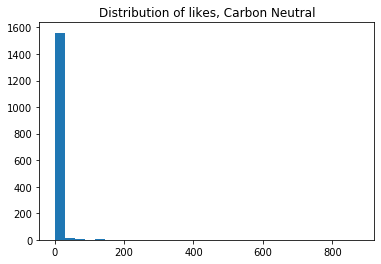

In [3]:
plt.hist(df["likes"], bins = 30)
plt.title("Distribution of likes, Carbon Neutral")
plt.show()

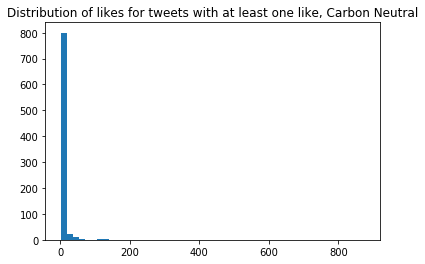

In [4]:
plt.hist(df[df["likes"] > 0]["likes"], bins = 50)
plt.title("Distribution of likes for tweets with at least one like, Carbon Neutral")
plt.show()

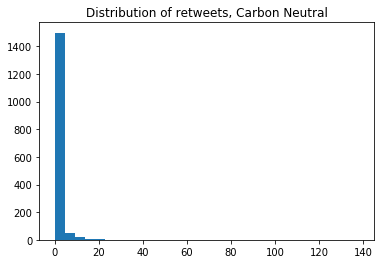

In [5]:
plt.hist(df["retweets"], bins = 30)
plt.title("Distribution of retweets, Carbon Neutral")
plt.show()

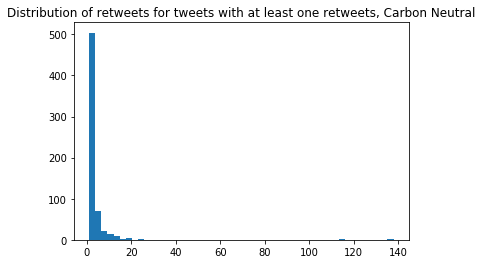

In [6]:
plt.hist(df[df["retweets"] > 0]["retweets"], bins = 50)
plt.title("Distribution of retweets for tweets with at least one retweets, Carbon Neutral")
plt.show()

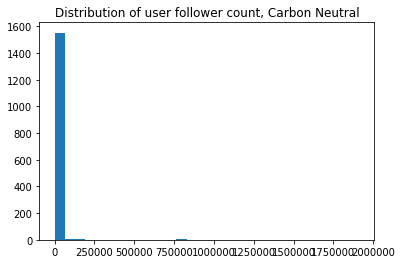

In [7]:
plt.hist(df["user_followers_count"], bins = 30)
plt.title("Distribution of user follower count, Carbon Neutral")
plt.show()

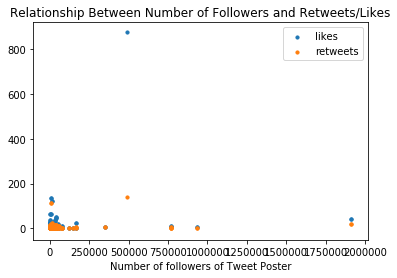

In [8]:
plt.scatter("user_followers_count", "likes", data = df, label = "likes", s = 10)
plt.scatter("user_followers_count", "retweets", data = df, label = "retweets", s = 10)
plt.xlabel("Number of followers of Tweet Poster")
plt.title("Relationship Between Number of Followers and Retweets/Likes")
plt.legend()
plt.show()

As expected, for both likes and retweets the vast majority of tweets are liked/favorite very few times and very very few are liked/favorite a huge number of times. It could be interesting to see who are the users that tweet the tweets with high stats. Keeping in mind that more retweets/likes generally means more people see it. However, knowing whether people feel positively or negatively toward the tweet is a very different question.

Regarding the final graph, it seems that the number of followers for this subject isn't strongly affecting the number of likes/retweets. However this may have to do with kind of engagement some users have.

#### Tweeters

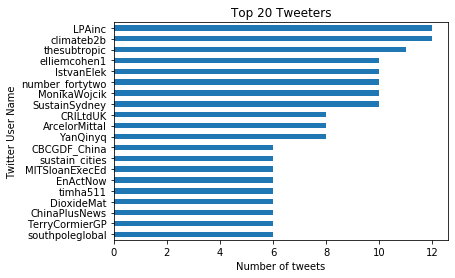

In [9]:
users = df.user_name.value_counts().sort_values()
users[-20:].plot.barh()
plt.title("Top 20 Tweeters")
plt.ylabel("Twitter User Name")
plt.xlabel("Number of tweets")
plt.show()

#### Hashtags

In [10]:
hashtags = processing.get_entities(df)

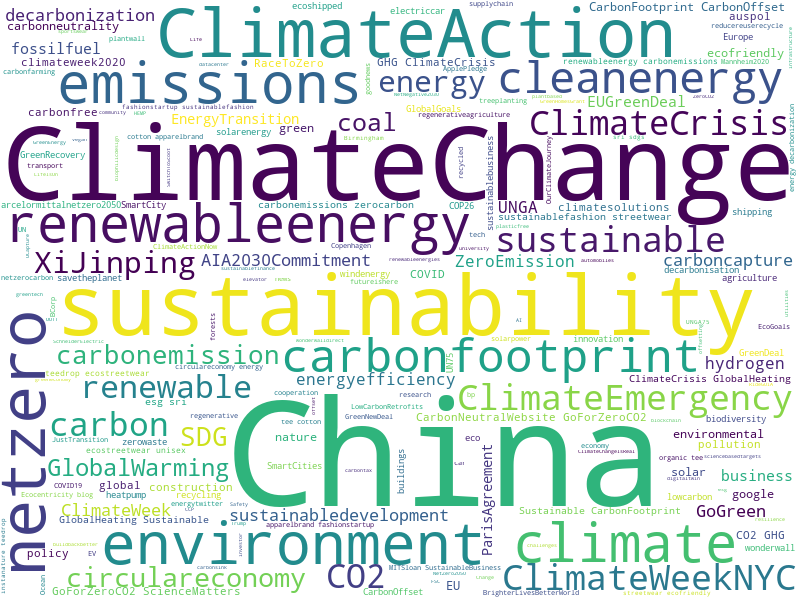

In [11]:
hashtags_cloud = WordCloud(background_color = "white", stopwords = ["CarbonNeutral", "carbon neutral"], width = 800, height = 600)
hashtags_cloud.generate(" ".join(hashtags))
hashtags_cloud.to_image()

Since China announced it's carbon neutral goal this past week, clearly many of the tweets scraped reflect a response to that.

#### Mentions

In [12]:
mentions = processing.get_entities(df, "mentions")

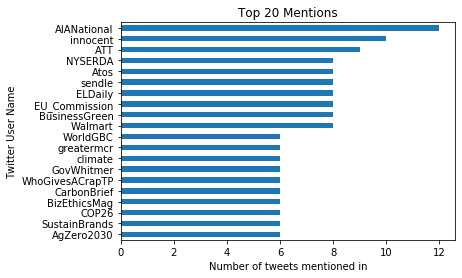

In [13]:
unique_mentions = np.unique(mentions, return_counts = True)
m = pd.Series(unique_mentions[1], index = unique_mentions[0])
m.sort_values()[-20:].plot.barh()
plt.title("Top 20 Mentions")
plt.ylabel("Twitter User Name")
plt.xlabel("Number of tweets mentioned in")
plt.show()

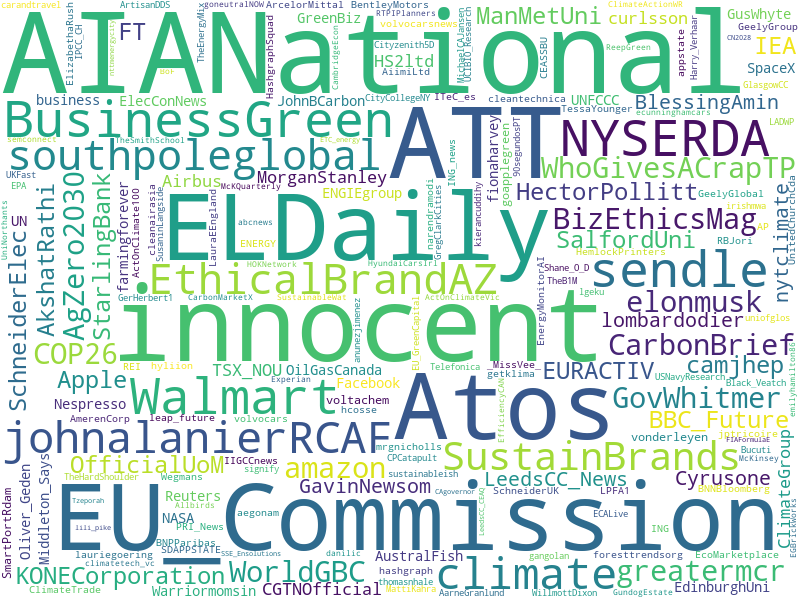

In [14]:
mentions_cloud = WordCloud(background_color = "white", width = 800, height = 600, collocations = False)
mentions_cloud.generate(" ".join(mentions))
mentions_cloud.to_image()

#### Tweets

In [3]:
tweets = df["tweet"].apply(processing.clean_text_lda)

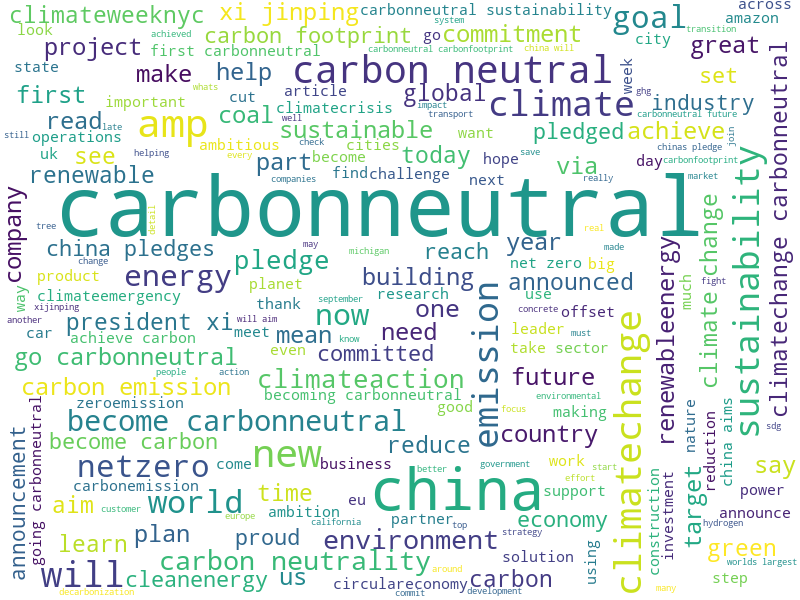

In [16]:
tweets_cloud = WordCloud(background_color = "white", stopwords = STOPWORDS, width = 800, height = 600)
tweets_cloud.generate(" ".join(list(tweets)))
tweets_cloud.to_image()

#### LDA

In [17]:
count_vectorizer = CountVectorizer(stop_words = 'english')
tweet_data = count_vectorizer.fit_transform(list(tweets))

In [18]:
number_topics = 8
number_words = 20
lda = LDA(n_components = number_topics, n_jobs = -1)
lda.fit(tweet_data)

LatentDirichletAllocation(n_components=8, n_jobs=-1)

In [19]:
processing.print_top_words(lda, count_vectorizer.get_feature_names(), 20)

Topic #0: carbonneutral carbon neutral climate future china good amp new announced climatechange energy emissions building planning week michigan carbonoffset commitment means
Topic #1: carbonneutral amp energy china learn new carbon mean climateaction sustainable says whats future emissions renewableenergy green projects going climate make
Topic #2: carbonneutral china carbon sustainability emissions world energy new sustainable amp chinas environment impact business climatechange coal netzero worlds goals announced
Topic #3: carbonneutral carbon amp neutral energy climate read new climatechange sustainability reduce china cleanenergy apple innovation footprint help decarbonization chinas power
Topic #4: carbonneutral china emissions global climate carbon amp goal netzero great climatechange climateaction sustainability pledge commitment country zero chinas worlds warming
Topic #5: carbonneutral climatechange climate china climateaction new amp carbon help energy global chinas sustain

In [20]:
pyLDAvis.sklearn.prepare(lda, tweet_data, count_vectorizer)

/Users/tabithasugumar/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.011935 -0.026425       1        1  16.712087
2     -0.024684 -0.021831       2        1  15.205846
7     -0.158799  0.040611       3        1  14.894645
4     -0.093989  0.022249       4        1  13.280316
5      0.013722 -0.001049       5        1  11.699442
0      0.075030 -0.176143       6        1  11.112505
1      0.151319  0.138309       7        1  10.652327
6      0.025466  0.024280       8        1   6.442833, topic_info=     Category        Freq        Term       Total  loglift  logprob
4497  Default   65.000000          xi   65.000000  30.0000  30.0000
683   Default  378.000000       china  378.000000  29.0000  29.0000
2376  Default   48.000000     jinping   48.000000  28.0000  28.0000
2872  Default   69.000000  neutrality   69.000000  27.0000  27.0000
3226  Default   47.000000   president   47.000000  26.0000  26.0000
...       ...         ...         ...         ...      ...      ...
2235   Topic8    4.713245   important   28.501006   0.9426  -5.8255
3417   Topic8    4.713243   reduction   30.340021   0.8801  -5.8255
2835   Topic8    4.713234      nature   31.158581   0.8535  -5.8255
474    Topic8    4.713190   buildings   34.284696   0.7579  -5.8255
2680   Topic8    4.712995       means   32.795950   0.8022  -5.8255

[598 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
30        1  0.144459     achieve
30        2  0.160510     achieve
30        3  0.385225     achieve
30        4  0.096306     achieve
30        5  0.080255     achieve
...     ...       ...         ...
4524      5  0.117444        zero
4524      6  0.039148        zero
4524      7  0.097870        zero
4525      2  0.810088  zerocarbon
4525      7  0.180020  zerocarbon

[1132 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 8, 5, 6, 1, 2, 7])

#### Overall Sentiment Anaysis

In [23]:
nrc = NRCLex(". ".join(list(tweets)))

In [33]:
#Note: Unclear what these counts actually represent (more than the number of tweets (sentences))
display(pd.DataFrame(nrc.raw_emotion_scores.items(), columns = ["emotion", "frequency"]).sort_values(by = "frequency")[::-1])

,emotion,frequency
1,positive,11859
2,negative,11550
9,trust,11372
3,sadness,10156
0,anticip,9973
6,anger,9906
8,fear,9883
5,joy,9741
4,disgust,9297
7,surprise,9291


In [29]:
emotion_freq = pd.DataFrame(nrc.affect_frequencies.items(), columns = ["emotion", "frequency"])
emotion_freq = emotion_freq.sort_values(by = "frequency")
display(emotion_freq[::-1])

,emotion,frequency
5,positive,0.115105
6,negative,0.112105
3,trust,0.110378
7,sadness,0.098575
2,anticip,0.096799
1,anger,0.096149
0,fear,0.095925
9,joy,0.094547
8,disgust,0.090238
4,surprise,0.090179


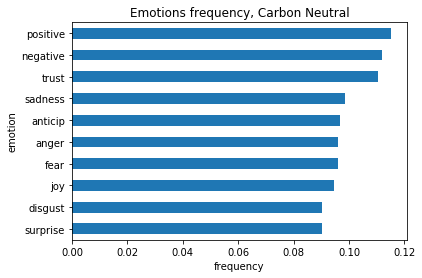

In [35]:
emotion_freq.set_index("emotion").plot.barh(legend = False)
plt.title("Emotions frequency, Carbon Neutral")
plt.xlabel("frequency")
plt.ylabel("emotion")
plt.show()

In [28]:
nrc.top_emotions

[('positive', 0.11510463175059207)]

#### Sentiment Analysis with Vader

In [5]:
sa = SentimentIntensityAnalyzer()
sa_results = {tweet:sa.polarity_scores(tweet) for tweet in list(tweets)}
sa_avgs = {val:np.mean([sent[val] for sent in sa_results.values()]) for val in ["neg", "neu", "pos"]}

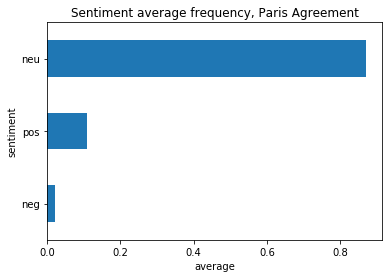

In [54]:
pos_neg_avg = pd.DataFrame(sa_avgs.items(), columns = ["sentiment", "frequency"]).sort_values(by = "frequency")
pos_neg_avg.set_index("sentiment").plot.barh(legend = False)
plt.title("Sentiment average frequency, Paris Agreement")
plt.xlabel("average")
plt.ylabel("sentiment")
plt.show()

In [46]:
display(pos_neg_avg[::-1])

,sentiment,frequency
1,neu,0.870152
2,pos,0.108179
0,neg,0.021663


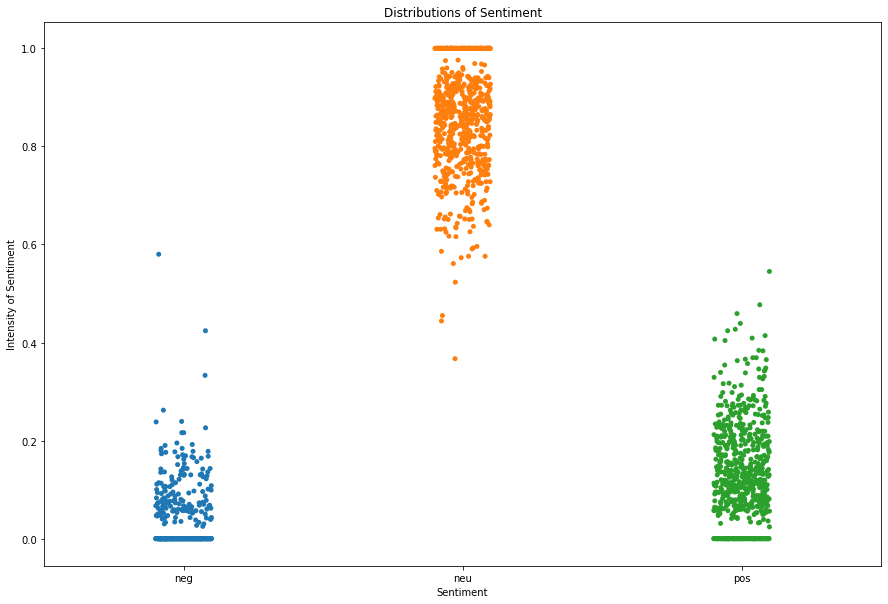

In [7]:
plt.figure(figsize=(15,10))
strp = {val:[sent[val] for sent in sa_results.values()] for val in ["neg", "neu", "pos"]}
strp = pd.DataFrame.from_dict(strp)
sns.stripplot(data = strp)
plt.title("Distributions of Sentiment")
plt.ylabel("Intensity of Sentiment")
plt.xlabel("Sentiment")
plt.show()

#### Sentiment Analysis by topic
*Note: Very uncertain about the validatity of this approach -- I think clustering would make more sense*

In [36]:
topics = []
for idx, topic in enumerate(lda.components_):
    topics.append([count_vectorizer.get_feature_names()[i] for i in topic.argsort()[:-len(topic) - 1:-1]])

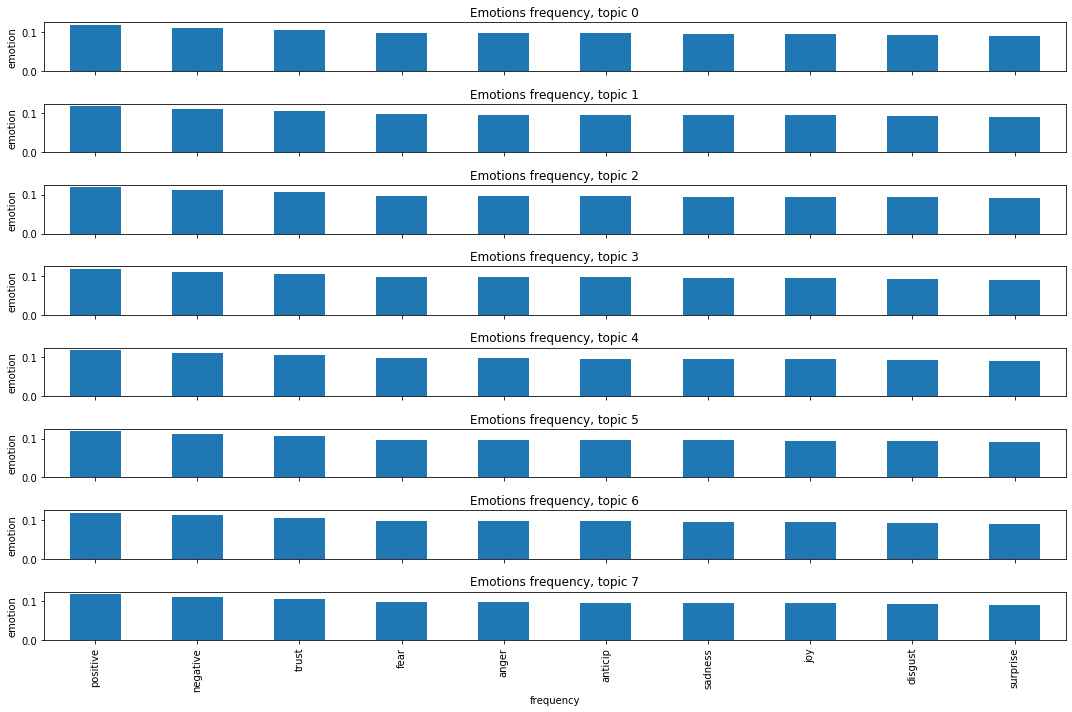

In [40]:
fig, ax = plt.subplots(len(topics),1, figsize = (15, 10), sharex = True)
for i in range(len(topics)):
    nrc = NRCLex(" ".join(topics[i]))
    emotion_freq = pd.DataFrame(nrc.affect_frequencies.items(), columns = ["emotion", "frequency"]).sort_values(by = "frequency", ascending = False).set_index("emotion")
    emotion_freq.plot.bar(ax = ax[i], legend = False)
    ax[i].set_title("Emotions frequency, topic {}".format(str(i)))
    ax[i].set_xlabel("frequency")
    ax[i].set_ylabel("emotion")
    plt.tight_layout()